# Predicting survival from titanic crash

In [5]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
#dropping unnecessary columns
df.head() 

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [7]:
x = df.drop('Survived',axis='columns')
y = df.Survived
#Dividing X and Y

In [8]:
dummies = pd.get_dummies(x['Sex']).astype(int)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [9]:
x = pd.concat([x,dummies],axis='columns')#adding new female and male column
x.head(3) 


,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [10]:
#dropping male column as one column is enough to repressent male vs female
x.drop(['Sex','male'],axis='columns',inplace=True)
x.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [11]:
#checking for null
x.columns[x.isna().any()]

Index(['Age'], dtype='object')

In [42]:
x.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [12]:
#filling the null
x.Age = x.Age.fillna(x.Age.mean())
x.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


# It is the time to train the model

In [44]:
#dividing data points for train and test
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.3)

In [45]:
#using from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [47]:
#trained the model
model.fit(xtrain,ytrain)

GaussianNB()

In [51]:
#predicting the test data
pred = model.predict(xtest)
pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1], dtype=int64)

In [52]:
#Accuracy
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.17598119008862356

In [53]:
xtest[0:10] #checking with xtest and ytest

,Pclass,Age,Fare,female
832,3,29.699118,7.2292,0
467,1,56.000000,26.5500,0
165,3,9.000000,20.5250,0
489,3,9.000000,15.9000,0
471,3,38.000000,8.6625,0
66,2,29.000000,10.5000,1
317,2,54.000000,14.0000,0
779,1,43.000000,211.3375,1
399,2,28.000000,12.6500,1
72,2,21.000000,73.5000,0


In [54]:
ytest[0:10]

832    0
467    0
165    1
489    1
471    0
66     1
317    0
779    1
399    1
72     0
Name: Survived, dtype: int64

In [57]:
model.predict(xtest[0:10]) #check the outcome. it is something different from ytest[0:10]. its ok

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

# Email Spam Filter

In [58]:
import pandas as pd
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df.groupby('Category').describe()

Message                                                             
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later  \
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [60]:
x = df.Message
y = df.Category

In [61]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.25,random_state=50) 

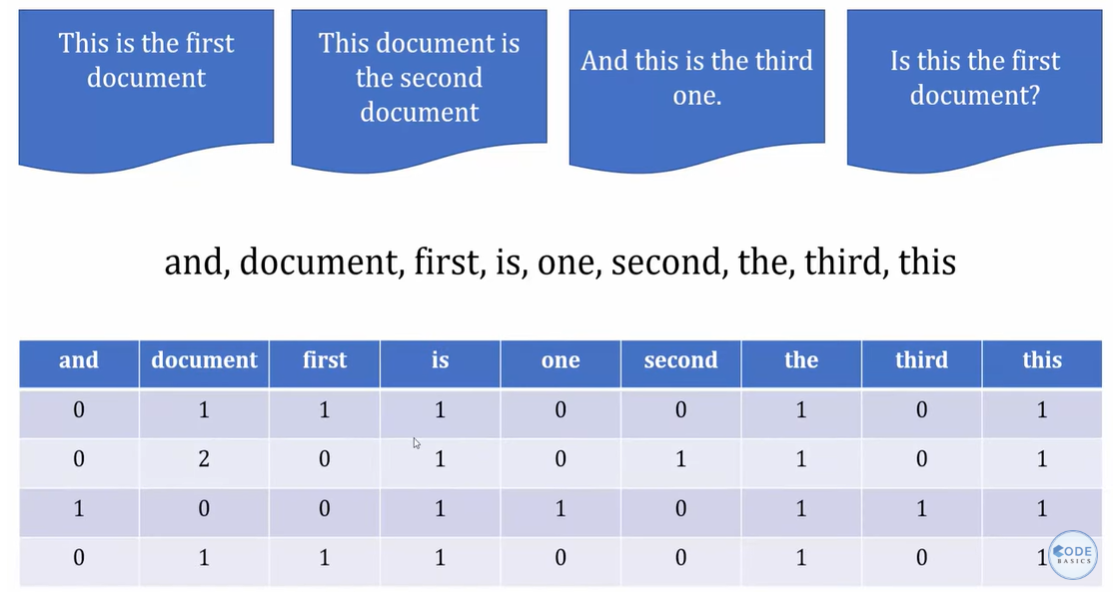<br>
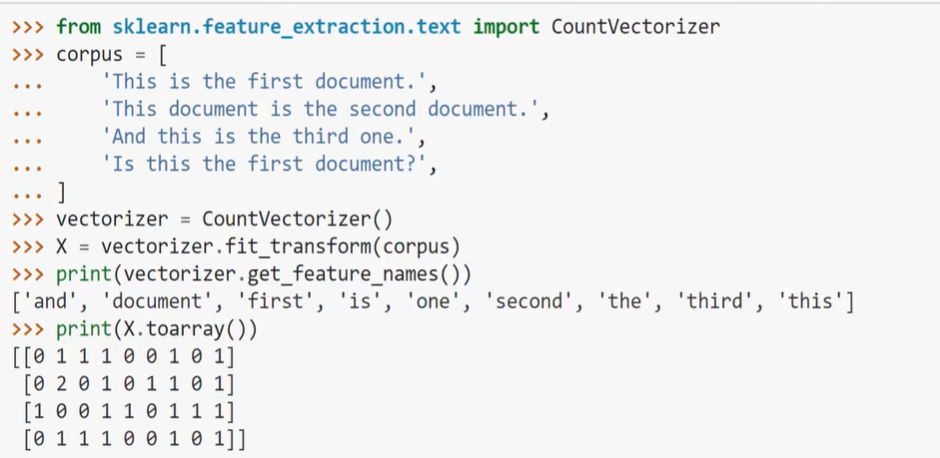<br>

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
xtrain_count = v.fit_transform(xtrain.values)
xtrain_count.toarray()[0:4] #made the train value integer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
#training the model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xtrain_count,ytrain)

MultinomialNB()

In [77]:
emails = [
    'Hey Bidita, can we get together to watch movie tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
pred = model.predict(emails_count)
pred

array(['ham', 'spam'], dtype='<U4')

In [82]:
#Accuracy 
xtest_count = v.transform(xtest)
model.score(xtest_count, ytest)

0.9842067480258435

# Sklearn Pipeline for simplifying the above codes

In [83]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [84]:
clf.fit(xtrain, ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [86]:
clf.predict(emails)

array(['ham', 'spam'], dtype='<U4')